# Assignment Milestones

## 1. Data
The project should use a real-world dataset and include a reference to the
source in the report

### Top Spotify songs from 2010-2019 - BY YEAR
https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year

<hr>

#### Columns
- ID: ID of the song
- title: Name of the Track
- artist: Name of the Artist
- top genre: Genre of the track
- year: The release year of the recording
- bpm (Beats Per Minute): The tempo of the song
- nrgy (Energy): The energy of a song - the higher the value, the more energetic song
- dnce (Danceability): The higher the value, the easier it is to dance to this song
- db (Loudness): The higher the value, the louder the song
- live (Liveness): The higher the value, the more likely the song is a live recording
- val (Valence): The higher the value, the more positive mood for the song
- dur (Duration): The duration of the song
- acous (Acousticness): The higher the value the more acoustic the song is
- spch (Speechiness): The higher the value the more spoken word the song contains
- pop (Popularity): The higher the value the more popular the song is

## 2. Importing
- Import data from a flat file (.csv, .xls, xlsx, .txt, etc.)
- Retrieve data using online SQL, APIs, or web scraping

In [2]:
# Import pandas library
import pandas as pd

# read the csv file in library
df = pd.read_csv("datasets/top_spotify_songs_2010_to_2019.csv", index_col = 0)

# show results
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### Retrieve data using SQL
<hr>

In [3]:
# import sqlalchemy and create a sqlite engine
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo=False)

# export the dataframe as a table 'spotify_top_songs' to the sqlite engine
df.to_sql("spotify_top_songs", con=engine)

In [4]:
# execute SQL by selecting all
result = engine.execute("SELECT * FROM spotify_top_songs")

# fetch all rows
rows = result.fetchall()
# print(rows)

### Retrieve data using API
#### Note: Obtaining data using API will be demonstrated as example (not related to current project)
<hr>

In [5]:
# Retrieve earthquake data provided by USGS.gov using their own API
import requests
import json

def earthquake(f):
    paramss = {"format": "geojson", "starttime": "2018-01-01", "endtime": "2019-12-31", "alertlevel": "orange"}
    data = requests.get(f, params = paramss)
    data = json.loads(data.text)
    return data

f = r"https://earthquake.usgs.gov/fdsnws/event/1/query?"
a = earthquake(f)

for i in (a["features"]):
    print('Time:', i["properties"]["time"], '/Place:', i["properties"]["place"], 
    '/Magnitude:',i["properties"]["cdi"], '/Tsunami:',i["properties"]["tsunami"])


Time: 1574736852872 /Place: 15 km WSW of Mamurras, Albania /Magnitude: 9.1 /Tsunami: 0
Time: 1573166827041 /Place: 59 km NE of Hashtr?d, Iran /Magnitude: 7.9 /Tsunami: 0
Time: 1569322914990 /Place: 8 km SSE of New Mirpur, Pakistan /Magnitude: 6.6 /Tsunami: 0
Time: 1561213796148 /Place: 11 km SE of Xunchang, China /Magnitude: 5.8 /Tsunami: 0
Time: 1558856475073 /Place: 78 km NE of Navarro, Peru /Magnitude: 8.9 /Tsunami: 1
Time: 1547947972480 /Place: 10 km SSW of Coquimbo, Chile /Magnitude: 7.6 /Tsunami: 1
Time: 1543598969330 /Place: 1 km SE of Point MacKenzie, Alaska /Magnitude: 7.9 /Tsunami: 1
Time: 1536170879150 /Place: 27 km ESE of Chitose, Japan /Magnitude: 8.1 /Tsunami: 1
Time: 1533469598630 /Place: 36 km NW of Labuan Lombok, Indonesia /Magnitude: 8.9 /Tsunami: 0


### Retrieve data using Web Scraping
#### Note: Obtaining data using web scraping will be demonstrated as example (not related to current project)
<hr>

In [6]:
# import urlopen()
from urllib.request import urlopen

url = "http://olympus.realpython.org/profiles/aphrodite"
page = urlopen(url)

# urlopen() returns an HTTPResponse object
page

In [7]:
#use .decode() to decode the bytes to a string using UTF-8
html = page.read().decode("utf-8")

print(html)

<html>
<head>
<title>Profile: Aphrodite</title>
</head>
<body bgcolor="yellow">
<center>
<br><br>
<img src="/static/aphrodite.gif" />
<h2>Name: Aphrodite</h2>
<br><br>
Favorite animal: Dove
<br><br>
Favorite color: Red
<br><br>
Hometown: Mount Olympus
</center>
</body>
</html>



## 3. Preperation
- Create pandas DataFrame
- Sorting, indexing, grouping
- Drop duplicates, replace missing values
- Merge DataFrames

### DataFrame
<hr>

In [8]:
# format result as a dataframe
spotify_top_songs = pd.DataFrame(rows)
spotify_top_songs.columns = result.keys()

# show first 5 results
spotify_top_songs.head()

,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### Data Cleaning
<hr>

In [9]:
spotify_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      603 non-null    int64 
 1   title      603 non-null    object
 2   artist     603 non-null    object
 3   top genre  603 non-null    object
 4   year       603 non-null    int64 
 5   bpm        603 non-null    int64 
 6   nrgy       603 non-null    int64 
 7   dnce       603 non-null    int64 
 8   dB         603 non-null    int64 
 9   live       603 non-null    int64 
 10  val        603 non-null    int64 
 11  dur        603 non-null    int64 
 12  acous      603 non-null    int64 
 13  spch       603 non-null    int64 
 14  pop        603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [10]:
# clean columns
### replace 'space' to '_' 
spotify_top_songs.columns = spotify_top_songs.columns.str.replace(' ','_', regex=False)

### remove 'index' to 'ID'
spotify_top_songs.columns = spotify_top_songs.columns.str.replace('index','ID')

spotify_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         603 non-null    int64 
 1   title      603 non-null    object
 2   artist     603 non-null    object
 3   top_genre  603 non-null    object
 4   year       603 non-null    int64 
 5   bpm        603 non-null    int64 
 6   nrgy       603 non-null    int64 
 7   dnce       603 non-null    int64 
 8   dB         603 non-null    int64 
 9   live       603 non-null    int64 
 10  val        603 non-null    int64 
 11  dur        603 non-null    int64 
 12  acous      603 non-null    int64 
 13  spch       603 non-null    int64 
 14  pop        603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [11]:
# set index to 'ID'
spotify_top_songs = spotify_top_songs.set_index('ID')
spotify_top_songs

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70


In [12]:
# shape of dataset
spotify_top_songs.shape

(603, 14)

In [13]:
# columns of dataset
spotify_top_songs.columns

Index(['title', 'artist', 'top_genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [14]:
# summary statistics
spotify_top_songs.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


### Indexing
#### a) Column Access [ ]
<hr>

In [15]:
# get types of tracknames
type(spotify_top_songs[['title']])

pandas.core.frame.DataFrame

In [16]:
# get all tracknames as DataFrame
spotify_top_songs[['title']]

,title
ID,
1,"Hey, Soul Sister"
2,Love The Way You Lie
3,TiK ToK
4,Bad Romance
5,Just the Way You Are
...,...
599,Find U Again (feat. Camila Cabello)
600,Cross Me (feat. Chance the Rapper & PnB Rock)
601,"No Brainer (feat. Justin Bieber, Chance the Ra..."


In [17]:
# get trackname and artistname 
spotify_top_songs[['artist','title']]

,artist,title
ID,,
1,Train,"Hey, Soul Sister"
2,Eminem,Love The Way You Lie
3,Kesha,TiK ToK
4,Lady Gaga,Bad Romance
5,Bruno Mars,Just the Way You Are
...,...,...
599,Mark Ronson,Find U Again (feat. Camila Cabello)
600,Ed Sheeran,Cross Me (feat. Chance the Rapper & PnB Rock)
601,DJ Khaled,"No Brainer (feat. Justin Bieber, Chance the Ra..."


#### b) Row Access [ ]
<hr>

In [18]:
# get first 5 rows
spotify_top_songs[0:5]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [19]:
# get 6th to 10th rows
spotify_top_songs[5:10]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


#### c) Row & Column Access (LOC)
<hr>

In [20]:
# get row of ID 4
spotify_top_songs.loc[[4]]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79


In [21]:
#get rows of ID 4,5,6
spotify_top_songs.loc[[4,5,6]]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77


In [22]:
# get rows and 'trackname','artistname' and 'genre' columns for ID 4,5,6
spotify_top_songs.loc[[4,5,6], ['title','artist','top_genre']]

,title,artist,top_genre
ID,,,
4,Bad Romance,Lady Gaga,dance pop
5,Just the Way You Are,Bruno Mars,pop
6,Baby,Justin Bieber,canadian pop


In [23]:
# get all rows and 'trackname','artistname' and 'genre'
spotify_top_songs.loc[:, ['title','artist','top_genre']]

,title,artist,top_genre
ID,,,
1,"Hey, Soul Sister",Train,neo mellow
2,Love The Way You Lie,Eminem,detroit hip hop
3,TiK ToK,Kesha,dance pop
4,Bad Romance,Lady Gaga,dance pop
5,Just the Way You Are,Bruno Mars,pop
...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop


In [24]:
# get first 3 rows and all columns
spotify_top_songs.loc[0:3, :]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80


In [25]:
# get rows for 2019
spotify_top_songs.loc[spotify_top_songs['year'] == 2019]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93
578,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
579,Trampoline (with ZAYN),SHAED,electropop,2019,127,46,62,-6,14,50,184,56,3,92
580,Happier,Marshmello,brostep,2019,100,79,69,-3,17,67,214,19,5,90
581,Truth Hurts,Lizzo,escape room,2019,158,62,72,-3,12,41,173,11,11,90


In [26]:
# get title, artist and genre for year 2012
spotify_top_songs.loc[spotify_top_songs['year'] == 2012,['title','artist','top_genre']]

,title,artist,top_genre
ID,,,
105,Titanium (feat. Sia),David Guetta,dance pop
106,Locked Out of Heaven,Bruno Mars,pop
107,Paradise,Coldplay,permanent wave
108,Payphone,Maroon 5,pop
109,What Makes You Beautiful,One Direction,boy band
110,I Knew You Were Trouble.,Taylor Swift,pop
111,Call Me Maybe,Carly Rae Jepsen,canadian pop
112,Love You Like A Love Song,Selena Gomez & The Scene,dance pop
113,Set Fire to the Rain,Adele,british soul


#### d) Row & Column Access (ILOC)
<hr>

In [27]:
# get first row in DataFrame
spotify_top_songs.iloc[[0]]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83


In [28]:
# get first 3 rows
spotify_top_songs.iloc[[0,1,2]]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80


In [29]:
# get rows and 'trackname','artistname' and 'genre' col for ID 1,2,3
spotify_top_songs.iloc[[0,1,2],[0,1,2]]

,title,artist,top_genre
ID,,,
1,"Hey, Soul Sister",Train,neo mellow
2,Love The Way You Lie,Eminem,detroit hip hop
3,TiK ToK,Kesha,dance pop


In [30]:
# get first 5 rows
spotify_top_songs.iloc[0:5, :]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [31]:
# get last 5 rows
spotify_top_songs.iloc[-5:]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69
603,Kills You Slowly,The Chainsmokers,electropop,2019,150,44,70,-9,13,23,213,6,6,67


In [32]:
# get first 5 rows and first 3 columns
spotify_top_songs.iloc[:5, :3]

,title,artist,top_genre
ID,,,
1,"Hey, Soul Sister",Train,neo mellow
2,Love The Way You Lie,Eminem,detroit hip hop
3,TiK ToK,Kesha,dance pop
4,Bad Romance,Lady Gaga,dance pop
5,Just the Way You Are,Bruno Mars,pop


In [33]:
# get all tracknames
spotify_top_songs.iloc[:,[0]]

,title
ID,
1,"Hey, Soul Sister"
2,Love The Way You Lie
3,TiK ToK
4,Bad Romance
5,Just the Way You Are
...,...
599,Find U Again (feat. Camila Cabello)
600,Cross Me (feat. Chance the Rapper & PnB Rock)
601,"No Brainer (feat. Justin Bieber, Chance the Ra..."


In [34]:
# get all trackname and artist name
spotify_top_songs.iloc[:,[0,1]]

,title,artist
ID,,
1,"Hey, Soul Sister",Train
2,Love The Way You Lie,Eminem
3,TiK ToK,Kesha
4,Bad Romance,Lady Gaga
5,Just the Way You Are,Bruno Mars
...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled


### Sorting
<hr>

In [35]:
# sort according to year
year_sort = spotify_top_songs.sort_values('year')
year_sort

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
29,Teenage Dream,Katy Perry,dance pop,2010,120,80,72,-5,13,59,228,2,4,63
30,California Gurls,Katy Perry,dance pop,2010,125,75,79,-4,18,40,235,0,5,62
31,3,Britney Spears,dance pop,2010,135,71,70,-2,14,79,213,5,5,62
32,My First Kiss - feat. Ke$ha,3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99


In [36]:
# sort according to artist
an_sort = spotify_top_songs.sort_values('artist')
an_sort

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
32,My First Kiss - feat. Ke$ha,3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,62
230,She Looks So Perfect,5 Seconds of Summer,boy band,2014,160,95,49,-4,33,44,202,0,13,71
250,Say Something,A Great Big World,neo mellow,2014,138,15,45,-9,9,9,229,87,3,61
22,Whataya Want from Me,Adam Lambert,australian pop,2010,186,68,44,-5,6,45,227,1,5,66
38,If I Had You,Adam Lambert,australian pop,2010,131,91,65,-4,37,79,228,1,11,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,True Colors,Zedd,complextro,2016,126,79,57,-3,10,49,225,40,4,51
488,Get Low (with Liam Payne),Zedd,complextro,2017,108,93,72,-4,5,54,205,3,5,66
133,We Are Young (feat. Janelle Monáe),fun.,baroque pop,2012,184,64,38,-6,8,74,251,2,8,63


In [37]:
# sort according to popularity
popularity_sort = spotify_top_songs.sort_values('pop', ascending=False)
popularity_sort

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0
443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


In [38]:
# sort according to year, popularity and Artist (highest to lowest)
yr_pop_artn_sort = spotify_top_songs.sort_values(['year','pop','artist'], ascending=[True,False,True])
yr_pop_artn_sort

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70


### Grouping
<hr>

In [39]:
#Calculating the number of songs of each genre
popular_genre=spotify_top_songs.groupby('top_genre').size().sort_values(ascending=False)
popular_genre

top_genre
dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
hip pop                        6
complextro                     6
australian dance               6
australian pop                 5
atl hip hop                    5
edm                            5
permanent wave                 4
hip hop                        4
latin                          4
colombian pop                  3
tropical house                 3
acoustic pop                   2
folk-pop                       2
brostep                        2
canadian hip hop               2
baroque pop                    2
detroit hip hop                2
downtempo                      2
candy pop                      2


In [40]:
#Calculating the number of songs of each year
year_songs_cnt=spotify_top_songs.groupby('year').size().sort_values(ascending=False)
year_songs_cnt

year
2015    95
2016    80
2013    71
2017    65
2018    64
2014    58
2011    53
2010    51
2012    35
2019    31
dtype: int64

In [41]:
#Calculating the number of artist appear in Spotify
num_artist=spotify_top_songs.groupby('artist').size().sort_values(ascending=False)
num_artist

artist
Katy Perry       17
Justin Bieber    16
Maroon 5         15
Rihanna          15
Lady Gaga        14
                 ..
Jonas Blue        1
John Newman       1
Joey Montana      1
Jewel             1
will.i.am         1
Length: 184, dtype: int64

In [42]:
#Calculating the number of songs according to Popularity
popularity = spotify_top_songs.groupby('pop').size().sort_values(ascending=False)
popularity

pop
72    33
78    27
73    26
76    24
65    23
      ..
33     1
35     1
39     1
48     1
99     1
Length: 71, dtype: int64

In [43]:
# find min length of each genre 
min_l = spotify_top_songs.groupby('top_genre')['dur'].transform(min) == spotify_top_songs['dur']
spotify_top_songs[min_l]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
ID,,,,,,,,,,,,,,
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
44,Loca,Shakira,colombian pop,2010,112,87,80,-4,9,85,193,19,7,56
48,DJ Got Us Fallin' In Love (feat. Pitbull),Usher,atl hip hop,2010,120,86,66,-3,8,65,221,3,11,52
64,Monster,Kanye West,chicago rap,2011,125,69,63,-6,67,10,379,0,20,73
133,We Are Young (feat. Janelle Monáe),fun.,baroque pop,2012,184,64,38,-6,8,74,251,2,8,63
144,Hall of Fame,The Script,celtic rock,2013,85,87,42,-4,12,63,203,7,6,80
148,Get Lucky (feat. Pharrell Williams & Nile Rodg...,Daft Punk,electro,2013,116,81,79,-9,10,86,248,4,4,77
158,Everybody Talks,Neon Trees,indie pop,2013,155,92,47,-4,31,73,177,0,6,74


In [44]:
# calculate mean, median and std 
stats = spotify_top_songs.groupby('top_genre')[['nrgy','dnce','dB','live','acous','spch']].agg(['mean','median','std'])
stats

nrgy                         dnce         \
                                mean median        std       mean median   
top_genre                                                                  
acoustic pop               61.000000   61.0  32.526912  42.500000   42.5   
alaska indie               34.000000   34.0        NaN  51.000000   51.0   
alternative r&b            40.000000   40.0        NaN  90.000000   90.0   
art pop                    60.125000   57.5  15.905412  52.375000   52.0   
atl hip hop                82.200000   86.0   5.310367  59.800000   65.0   
australian dance           72.000000   77.0  12.976903  45.833333   46.5   
australian hip hop         72.000000   72.0        NaN  91.000000   91.0   
australian pop             74.400000   75.0  13.849188  64.000000   65.0   
barbadian pop              68.466667   74.0  18.228183  62.066667   67.0   
baroque pop                69.000000   69.0   7.071068  52.500000   52.5   
belgian edm                67.000000   67.0   4.242641  72.000000   72.0   
big room                   77.200000   78.0  13.497325  60.900000   61.0   
boy band                   80.266667   82.0  14.825011  63.800000   65.0   
british soul               51.090909   52.0  27.442502  52.727273   59.0   
brostep                    77.500000   77.5   2.121320  60.500000   60.5   
canadian contemporary r&b  64.777778   59.0  15.793810  54.555556   58.0   
canadian hip hop           53.000000   53.0  16.970563  78.000000   78.0   
canadian latin             47.000000   47.0        NaN  80.000000   80.0   
canadian pop               68.117647   74.0  18.258688  63.735294   62.0   
candy pop                  86.000000   86.0   7.071068  69.500000   69.5   
celtic rock                87.000000   87.0        NaN  42.000000   42.0   
chicago rap                69.000000   69.0        NaN  63.000000   63.0   
colombian pop              83.333333   82.0   3.214550  76.333333   80.0   
complextro                 78.500000   78.5  10.445095  61.166667   59.0   
contemporary country       59.000000   59.0        NaN  47.000000   47.0   
dance pop                  72.825688   75.0  14.128580  65.972477   67.0   
danish pop                 47.000000   47.0        NaN  77.000000   77.0   
detroit hip hop            68.500000   68.5  34.648232  61.500000   61.5   
downtempo                  57.000000   57.0   9.899495  56.000000   56.0   
edm                        61.200000   59.0   6.260990  63.600000   63.0   
electro                    73.500000   73.5  10.606602  81.000000   81.0   
electro house              88.000000   88.0        NaN  69.000000   69.0   
electronic trap            76.000000   76.0   5.656854  74.500000   74.5   
electropop                 65.230769   64.0  15.653295  64.692308   65.0   
escape room                75.500000   75.5  19.091883  69.500000   69.5   
folk-pop                   35.500000   35.5  26.162951  45.000000   45.0   
french indie pop           89.000000   89.0        NaN  76.000000   76.0   
hip hop                    65.250000   70.0  11.842719  74.000000   72.5   
hip pop                    60.333333   60.5  19.490168  58.666667   59.5   
hollywood                  82.000000   82.0        NaN  56.000000   56.0   
house                      73.000000   73.0        NaN  50.000000   50.0   
indie pop                  87.500000   87.5   6.363961  47.500000   47.5   
irish singer-songwriter    66.000000   66.0        NaN  57.000000   57.0   
latin                      80.500000   81.5   6.244998  71.250000   72.0   
metropopolis               72.000000   72.0        NaN  68.000000   68.0   
moroccan pop               76.000000   76.0        NaN  75.000000   75.0   
neo mellow                 40.666667   34.0  30.935417  52.777778   52.0   
permanent wave             65.000000   63.5  18.018509  42.750000   44.0   
pop                        68.300000   70.5  13.908052  68.450000   70.0   
tropical house             73.666667   85.0  19.629909  49.000000   32.0   

   

In [45]:
# calculate mean of BeatsPerMinute group by Genre
meanBpm = spotify_top_songs.groupby('top_genre')['bpm'].mean()

meanBpm

top_genre
acoustic pop                 155.000000
alaska indie                 132.000000
alternative r&b              136.000000
art pop                      115.125000
atl hip hop                  102.800000
australian dance             128.833333
australian hip hop            95.000000
australian pop               153.800000
barbadian pop                125.333333
baroque pop                  146.000000
belgian edm                  122.000000
big room                     122.300000
boy band                     116.133333
british soul                 116.727273
brostep                      121.000000
canadian contemporary r&b    127.000000
canadian hip hop             109.000000
canadian latin                98.000000
canadian pop                 121.500000
candy pop                    109.000000
celtic rock                   85.000000
chicago rap                  125.000000
colombian pop                126.000000
complextro                   120.333333
contemporary country          

In [46]:
#calculate the average of the popularity and the size of each genre 
genre_popularity = spotify_top_songs.groupby("top_genre").agg(['mean', 'size'])["pop"]

#sort
genre_popularity = genre_popularity.sort_values(by=["mean"], ascending = False)

genre_popularity

,mean,size
top_genre,,
escape room,90.000000,2
brostep,86.000000,2
alternative r&b,84.000000,1
irish singer-songwriter,81.000000,1
danish pop,80.000000,1
celtic rock,80.000000,1
electronic trap,79.500000,2
edm,78.200000,5
canadian contemporary r&b,77.666667,9


### Pivoting
<hr>

In [47]:
# get the max and min popularity grouping by genre using pivot table
spotify_top_songs.pivot_table(index = ['top_genre'], values = ['pop'], aggfunc = ['max','min'])

,max,min
,pop,pop
top_genre,,
acoustic pop,71,46
alaska indie,36,36
alternative r&b,84,84
art pop,74,47
atl hip hop,72,28
australian dance,76,44
australian hip hop,70,70
australian pop,72,59


In [48]:
# get the max and min duration grouping by genre using pivot table
spotify_top_songs.pivot_table(index = ['top_genre'], values = ['dur'], aggfunc = ['max','min'])

,max,min
,dur,dur
top_genre,,
acoustic pop,255,221
alaska indie,250,250
alternative r&b,198,198
art pop,403,193
atl hip hop,329,221
australian dance,286,210
australian hip hop,200,200
australian pop,232,199


### Handling Nulls / Missing Values
<hr>

In [49]:
# calculate sum of nulls
spotify_top_songs.isnull().sum()

title        0
artist       0
top_genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

#### Result: No missing values are found in each column

### Duplicates
<hr>

In [50]:
duplicates = spotify_top_songs.duplicated().sum()
duplicates

0

#### Result: No duplicates are found in spotify_top_songs table

### Merge DataFrames
<hr>

#### Spotify Top 100 Songs of 2010-2019
https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019


In [51]:
# read the csv file in library
df2 = pd.read_csv("datasets/spotify_2010_to_2019_top100.csv")

# replace columns from ' ' to '_'
df2.columns = df2.columns.str.replace(' ','_', regex=False)

# show first 5 results
df2.head()

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year,artist_type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [52]:
# get shape of dataset
df2.shape

(1003, 17)

#### a) Data Cleaning
<hr>

In [53]:
# calculate sum of nulls
df2.isnull().sum()

title            3
artist           3
top_genre        3
year_released    3
added            3
bpm              3
nrgy             3
dnce             3
dB               3
live             3
val              3
dur              3
acous            3
spch             3
pop              3
top_year         3
artist_type      3
dtype: int64

In [54]:
# drop null rows
df2 = df2.dropna()

# calculate sum of nulls again
df2.isnull().sum()

title            0
artist           0
top_genre        0
year_released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top_year         0
artist_type      0
dtype: int64

In [55]:
# extract wanted columns

### added - Date song was added to Spotify's top hits playlist
### artist type - Type of artist - solo, duo, trio, band/group
filtered_df2 = df2[['title','artist','added','artist_type']]
filtered_df2

,title,artist,added,artist_type
0,STARSTRUKK (feat. Katy Perry),3OH!3,2022‑02‑17,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,2022‑02‑17,Duo
2,I Need A Dollar,Aloe Blacc,2022‑02‑17,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,2022‑02‑17,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,2022‑02‑17,Solo
...,...,...,...,...
995,SICKO MODE,Travis Scott,2020‑06‑22,Solo
996,EARFQUAKE,"Tyler, The Creator",2020‑06‑22,Solo
997,Boasty (feat. Idris Elba),Wiley,2020‑06‑22,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,2020‑08‑20,Duo


In [56]:
# find duplicated of title & artist
duplicates_df2 = filtered_df2[filtered_df2.duplicated(subset=['title','artist'])]
duplicates_df2

,title,artist,added,artist_type
135,Stereo Love - Radio Edit,Edward Maya,2020‑06‑16,Solo
186,What's My Name?,Rihanna,2020‑06‑16,Solo
194,If I Die Young,The Band Perry,2020‑06‑16,Band/Group
197,No Hands (feat. Roscoe Dash & Wale),Waka Flocka Flame,2020‑06‑16,Solo
220,Paradise,Coldplay,2020‑06‑22,Band/Group
255,Sexy And I Know It,LMFAO,2020‑06‑22,Duo
277,We Found Love,Rihanna,2020‑06‑22,Solo
316,Locked out of Heaven,Bruno Mars,2020‑06‑11,Solo
341,I Love It (feat. Charli XCX),Icona Pop,2020‑06‑11,Duo
378,Home,Phillip Phillips,2020‑06‑11,Solo


In [57]:
# drop duplicates of same title & artist and keep first
final_df2 = filtered_df2.drop_duplicates(subset=['title','artist'], keep="first")
final_df2

,title,artist,added,artist_type
0,STARSTRUKK (feat. Katy Perry),3OH!3,2022‑02‑17,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,2022‑02‑17,Duo
2,I Need A Dollar,Aloe Blacc,2022‑02‑17,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,2022‑02‑17,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,2022‑02‑17,Solo
...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,2020‑06‑22,Solo
996,EARFQUAKE,"Tyler, The Creator",2020‑06‑22,Solo
997,Boasty (feat. Idris Elba),Wiley,2020‑06‑22,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,2020‑08‑20,Duo


#### b) Merging two DataFrames
<hr>

In [58]:
# merge by TrackName & ArtistName
spotify_songs = spotify_top_songs.merge(final_df2, how='left', on=['title','artist'])

# two new columns added - 'added', 'artist_type'
spotify_songs

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,added,artist_type
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,2022‑02‑17,Band/Group
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,2022‑02‑17,Solo
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,2022‑02‑17,Solo
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,2022‑02‑17,Solo
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,2022‑02‑17,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75,NaN,NaN
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,2020‑06‑22,Solo
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70,NaN,NaN
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69,2020‑06‑22,Solo


In [59]:
# shape of old dataset 
spotify_top_songs.shape

(603, 14)

In [60]:
# shape of dataset
spotify_songs.shape

(603, 16)

In [61]:
# datatypes for each column
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 602
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        603 non-null    object
 1   artist       603 non-null    object
 2   top_genre    603 non-null    object
 3   year         603 non-null    int64 
 4   bpm          603 non-null    int64 
 5   nrgy         603 non-null    int64 
 6   dnce         603 non-null    int64 
 7   dB           603 non-null    int64 
 8   live         603 non-null    int64 
 9   val          603 non-null    int64 
 10  dur          603 non-null    int64 
 11  acous        603 non-null    int64 
 12  spch         603 non-null    int64 
 13  pop          603 non-null    int64 
 14  added        256 non-null    object
 15  artist_type  256 non-null    object
dtypes: int64(11), object(5)
memory usage: 80.1+ KB


#### c) Handling nulls / Replace missing values
<hr>

In [62]:
# calculate sum of nulls for each column
spotify_songs.isnull().sum()

title            0
artist           0
top_genre        0
year             0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
added          347
artist_type    347
dtype: int64

In [63]:
# replace null values with 'N/A'
spotify_songs["added"].fillna("N/A", inplace = True)
spotify_songs["artist_type"].fillna("N/A", inplace = True)

spotify_songs.isnull().sum()

title          0
artist         0
top_genre      0
year           0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
pop            0
added          0
artist_type    0
dtype: int64

In [64]:
# display dataset
spotify_songs

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,added,artist_type
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,2022‑02‑17,Band/Group
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,2022‑02‑17,Solo
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,2022‑02‑17,Solo
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,2022‑02‑17,Solo
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,2022‑02‑17,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75,N/A,N/A
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,2020‑06‑22,Solo
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70,N/A,N/A
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69,2020‑06‑22,Solo


## 4. Analysis
- Conditional statements, looping, groupby
- Define a custom function to create reusable code
- Use NumPy functions
- Dictionary or Lists

### Conditional statements, looping, groupby
<hr>

In [65]:
# determine whether the rating is good, average or bad based on the popularity of each song using for loop
for index, row in spotify_songs.iterrows():
    val = 'Rating for [' + row['title'] + ']: '
    if row['pop'] >= 80:
        val += 'Good'
    elif row['pop'] >= 70 and row['pop'] < 80:
        val += 'Average'
    elif row['pop'] < 70 : 
        val += 'Low'
       
    val += ' (' + str(row['pop']) + ') '
    print(val)

Rating for [Hey, Soul Sister]: Good (83) 
Rating for [Love The Way You Lie]: Good (82) 
Rating for [TiK ToK]: Good (80) 
Rating for [Bad Romance]: Average (79) 
Rating for [Just the Way You Are]: Average (78) 
Rating for [Baby]: Average (77) 
Rating for [Dynamite]: Average (77) 
Rating for [Secrets]: Average (77) 
Rating for [Empire State of Mind (Part II) Broken Down]: Average (76) 
Rating for [Only Girl (In The World)]: Average (73) 
Rating for [Club Can't Handle Me (feat. David Guetta)]: Average (73) 
Rating for [Marry You]: Average (73) 
Rating for [Cooler Than Me - Single Mix]: Average (73) 
Rating for [Telephone]: Average (73) 
Rating for [Like A G6]: Average (72) 
Rating for [OMG (feat. will.i.am)]: Average (72) 
Rating for [Eenie Meenie]: Average (71) 
Rating for [The Time (Dirty Bit)]: Average (70) 
Rating for [Alejandro]: Low (69) 
Rating for [Your Love Is My Drug]: Low (69) 
Rating for [Meet Me Halfway]: Low (68) 
Rating for [Whataya Want from Me]: Low (66) 
Rating for [Take

In [66]:
# display songs of each genre using for loop
for grpName, rows in spotify_songs.groupby('top_genre'):
    print("Genre: ", grpName)
    print('Songs: ')
    print(rows['title'])
    print("\n")

Genre:  acoustic pop
Songs: 
96     Turning Page
164           Brave
Name: title, dtype: object


Genre:  alaska indie
Songs: 
207    Foolish Games
Name: title, dtype: object


Genre:  alternative r&b
Songs: 
588    Talk (feat. Disclosure)
Name: title, dtype: object


Genre:  art pop
Songs: 
39                                     Dog Days Are Over
155    Summertime Sadness (Lana Del Rey Vs. Cedric Ge...
223                                                 Team
352                                              St Jude
422                              Wish That You Were Here
471                                                 Love
486     Summer Bummer (feat. A$AP Rocky & Playboi Carti)
499                      Lust for Life (with The Weeknd)
Name: title, dtype: object


Genre:  atl hip hop
Songs: 
15                         OMG (feat. will.i.am)
47     DJ Got Us Fallin' In Love (feat. Pitbull)
48       Castle Walls (feat. Christina Aguilera)
95       Castle Walls (feat. Christina Aguilera

### Define custom functions
<hr>

In [67]:
# get the max value of a column in table using function 
def get_max_val(table, col):
    max_val = None
    for index, row in table.iterrows():
        value = row[col]
        
        if max_val is None or value > max_val :
            max_val = value
            
    return max_val
    
# get the min value of a column in table using function 
def get_min_val(table, col):
    min_val = None
    for index, row in table.iterrows():
        value = row[col]

        if min_val is None or value < min_val:
            min_val = value
        
    return min_val
            

In [68]:
# get row of max popularity
max_popularity = get_max_val(spotify_songs, 'pop')

spotify_songs.loc[spotify_songs['pop'] == max_popularity]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,added,artist_type
572,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99,N/A,N/A


In [69]:
# get row of min popularity
min_popularity = get_min_val(spotify_songs, 'pop')

spotify_songs.loc[spotify_songs['pop'] == min_popularity]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,added,artist_type
50,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0,N/A,N/A
138,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0,2020‑06‑22,Solo
267,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0,2020‑06‑10,Solo
362,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0,N/A,N/A
442,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,N/A,N/A


In [70]:
# get row of max music duration
max_duration = get_max_val(spotify_songs, 'dur')

spotify_songs.loc[spotify_songs['dur'] == max_duration]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,added,artist_type
188,TKO,Justin Timberlake,dance pop,2013,138,68,61,-7,43,49,424,1,24,58,N/A,N/A


In [71]:
# get row of min music duration
min_duration = get_min_val(spotify_songs, 'dur')

spotify_songs.loc[spotify_songs['dur'] == min_duration]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,added,artist_type
330,Mark My Words,Justin Bieber,canadian pop,2015,114,26,38,-9,17,52,134,88,3,63,N/A,N/A


### NumPy functions
<hr>

In [72]:
import numpy as np

# sqrt() to get the square root of the BeatsPerMinute column
spotify_songs['bpm'].apply(np.sqrt)

0       9.848858
1       9.327379
2      10.954451
3      10.908712
4      10.440307
         ...    
598    10.198039
599     9.746794
600    11.661904
601    10.677078
602    12.247449
Name: bpm, Length: 603, dtype: float64

In [73]:
# convert spotify dataframe to numpy array
np_array = spotify_songs.to_numpy()

np_array

array([['Hey, Soul Sister', 'Train', 'neo mellow', ..., 83, '2022‑02‑17',
        'Band/Group'],
       ['Love The Way You Lie', 'Eminem', 'detroit hip hop', ..., 82,
        '2022‑02‑17', 'Solo'],
       ['TiK ToK', 'Kesha', 'dance pop', ..., 80, '2022‑02‑17', 'Solo'],
       ...,
       ['No Brainer (feat. Justin Bieber, Chance the Rapper & Quavo)',
        'DJ Khaled', 'dance pop', ..., 70, 'N/A', 'N/A'],
       ['Nothing Breaks Like a Heart (feat. Miley Cyrus)', 'Mark Ronson',
        'dance pop', ..., 69, '2020‑06‑22', 'Solo'],
       ['Kills You Slowly', 'The Chainsmokers', 'electropop', ..., 67,
        'N/A', 'N/A']], dtype=object)

In [74]:
# sum() to get total music length and beatsPerMinute
spotify_songs[['dur', 'bpm']].apply(np.sum)

dur    135479
bpm     71483
dtype: int64

In [75]:
# get mean, median and standard diviation group by genre
spotify_songs.groupby('top_genre')[['nrgy','dnce','dB','live','acous','spch']].agg([np.mean,np.median,np.std])

nrgy                         dnce         \
                                mean median        std       mean median   
top_genre                                                                  
acoustic pop               61.000000   61.0  32.526912  42.500000   42.5   
alaska indie               34.000000   34.0        NaN  51.000000   51.0   
alternative r&b            40.000000   40.0        NaN  90.000000   90.0   
art pop                    60.125000   57.5  15.905412  52.375000   52.0   
atl hip hop                82.200000   86.0   5.310367  59.800000   65.0   
australian dance           72.000000   77.0  12.976903  45.833333   46.5   
australian hip hop         72.000000   72.0        NaN  91.000000   91.0   
australian pop             74.400000   75.0  13.849188  64.000000   65.0   
barbadian pop              68.466667   74.0  18.228183  62.066667   67.0   
baroque pop                69.000000   69.0   7.071068  52.500000   52.5   
belgian edm                67.000000   67.0   4.242641  72.000000   72.0   
big room                   77.200000   78.0  13.497325  60.900000   61.0   
boy band                   80.266667   82.0  14.825011  63.800000   65.0   
british soul               51.090909   52.0  27.442502  52.727273   59.0   
brostep                    77.500000   77.5   2.121320  60.500000   60.5   
canadian contemporary r&b  64.777778   59.0  15.793810  54.555556   58.0   
canadian hip hop           53.000000   53.0  16.970563  78.000000   78.0   
canadian latin             47.000000   47.0        NaN  80.000000   80.0   
canadian pop               68.117647   74.0  18.258688  63.735294   62.0   
candy pop                  86.000000   86.0   7.071068  69.500000   69.5   
celtic rock                87.000000   87.0        NaN  42.000000   42.0   
chicago rap                69.000000   69.0        NaN  63.000000   63.0   
colombian pop              83.333333   82.0   3.214550  76.333333   80.0   
complextro                 78.500000   78.5  10.445095  61.166667   59.0   
contemporary country       59.000000   59.0        NaN  47.000000   47.0   
dance pop                  72.825688   75.0  14.128580  65.972477   67.0   
danish pop                 47.000000   47.0        NaN  77.000000   77.0   
detroit hip hop            68.500000   68.5  34.648232  61.500000   61.5   
downtempo                  57.000000   57.0   9.899495  56.000000   56.0   
edm                        61.200000   59.0   6.260990  63.600000   63.0   
electro                    73.500000   73.5  10.606602  81.000000   81.0   
electro house              88.000000   88.0        NaN  69.000000   69.0   
electronic trap            76.000000   76.0   5.656854  74.500000   74.5   
electropop                 65.230769   64.0  15.653295  64.692308   65.0   
escape room                75.500000   75.5  19.091883  69.500000   69.5   
folk-pop                   35.500000   35.5  26.162951  45.000000   45.0   
french indie pop           89.000000   89.0        NaN  76.000000   76.0   
hip hop                    65.250000   70.0  11.842719  74.000000   72.5   
hip pop                    60.333333   60.5  19.490168  58.666667   59.5   
hollywood                  82.000000   82.0        NaN  56.000000   56.0   
house                      73.000000   73.0        NaN  50.000000   50.0   
indie pop                  87.500000   87.5   6.363961  47.500000   47.5   
irish singer-songwriter    66.000000   66.0        NaN  57.000000   57.0   
latin                      80.500000   81.5   6.244998  71.250000   72.0   
metropopolis               72.000000   72.0        NaN  68.000000   68.0   
moroccan pop               76.000000   76.0        NaN  75.000000   75.0   
neo mellow                 40.666667   34.0  30.935417  52.777778   52.0   
permanent wave             65.000000   63.5  18.018509  42.750000   44.0   
pop                        68.300000   70.5  13.908052  68.450000   70.0   
tropical house             73.666667   85.0  19.629909  49.000000   32.0   

   

In [76]:
# max Speechiness
np.max(spotify_songs['spch'])

48

In [77]:
# min energy
np.min(spotify_songs['dB'])

-60

In [78]:
# range of Danceability between 75 and 100
spotify_songs[np.logical_and(spotify_songs['dnce'] >= 75, spotify_songs['dnce'] <= 100)]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,added,artist_type
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,2022‑02‑17,Solo
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,2022‑02‑17,Solo
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77,2022‑02‑17,Solo
9,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73,2022‑02‑17,Solo
12,Cooler Than Me - Single Mix,Mike Posner,dance pop,2010,130,82,77,-5,70,63,213,18,5,73,2022‑02‑17,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,Talk (feat. Disclosure),Khalid,alternative r&b,2019,136,40,90,-9,6,35,198,5,13,84,2020‑06‑22,Solo
589,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop,2019,122,89,81,-4,8,61,229,2,4,84,N/A,N/A
592,Girls Like You (feat. Cardi B),Maroon 5,pop,2019,125,54,85,-7,13,45,236,57,5,81,N/A,N/A
596,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",DJ Snake,electronic trap,2019,96,80,84,-4,6,62,213,16,23,77,N/A,N/A


In [79]:
# liveness that is either 8 or 11
spotify_songs[np.logical_or(spotify_songs['live'] == 8, spotify_songs['live']== 11)]

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,added,artist_type
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,2022‑02‑17,Band/Group
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,2022‑02‑17,Solo
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77,2022‑02‑17,Solo
13,Telephone,Lady Gaga,dance pop,2010,122,83,83,-6,11,71,221,1,4,73,2022‑02‑17,Solo
16,Eenie Meenie,Sean Kingston,dance pop,2010,121,61,72,-4,11,83,202,5,3,71,2022‑02‑17,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Beautiful People (feat. Khalid),Ed Sheeran,pop,2019,93,65,64,-8,8,55,198,12,19,86,N/A,N/A
585,Sucker,Jonas Brothers,boy band,2019,138,73,84,-5,11,95,181,4,6,86,2020‑06‑22,Band/Group
586,Don't Call Me Up,Mabel,dance pop,2019,99,88,67,-3,8,23,178,30,15,86,N/A,N/A
589,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop,2019,122,89,81,-4,8,61,229,2,4,84,N/A,N/A


### Dictionary or Lists
#### Note: Not related to current project
<hr>

In [80]:
# Convert an API JSON Response to Dictionary
url = "https://www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita"

# Get the JSON response and store it as a Python dict
my_dict = requests.get(url).json()

type(my_dict)

dict

In [81]:
# print my_dict
print(json.dumps(my_dict, indent=2))

{
  "drinks": [
    {
      "idDrink": "11007",
      "strDrink": "Margarita",
      "strDrinkAlternate": null,
      "strTags": "IBA,ContemporaryClassic",
      "strVideo": null,
      "strCategory": "Ordinary Drink",
      "strIBA": "Contemporary Classics",
      "strAlcoholic": "Alcoholic",
      "strGlass": "Cocktail glass",
      "strInstructions": "Rub the rim of the glass with the lime slice to make the salt stick to it. Take care to moisten only the outer rim and sprinkle the salt on it. The salt should present to the lips of the imbiber and never mix into the cocktail. Shake the other ingredients with ice, then carefully pour into the glass.",
      "strInstructionsES": null,
      "strInstructionsDE": "Reiben Sie den Rand des Glases mit der Limettenscheibe, damit das Salz daran haftet. Achten Sie darauf, dass nur der \u00e4u\u00dfere Rand angefeuchtet wird und streuen Sie das Salz darauf. Das Salz sollte sich auf den Lippen des Genie\u00dfers befinden und niemals in den Cockt

In [82]:
# loop my_dict and append 'strDrink' to empty list
my_list = []

for n in my_dict['drinks']:
    my_list.append(n['strDrink'])
    
my_list

['Margarita',
 'Blue Margarita',
 "Tommy's Margarita",
 'Whitecap Margarita',
 'Strawberry Margarita',
 'Smashed Watermelon Margarita']

## 5. Visualisation
- Generate at least two charts using Matplotlib or Seaborn

In [83]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 10 artist')

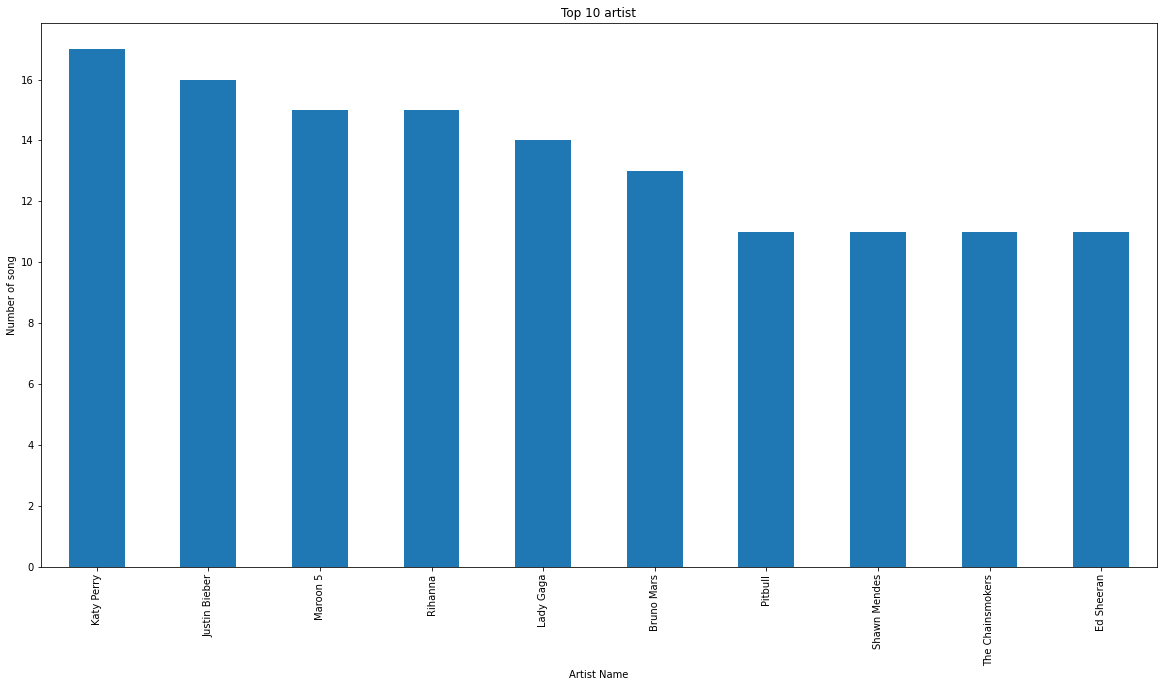

In [84]:
# top 10 artist
spotify_songs['artist'].value_counts().head(10).plot.bar(figsize=(20,10))
plt.xlabel('Artist Name')
plt.ylabel('Number of song')
plt.title('Top 10 artist')

Text(0.5, 1.0, 'Number of songs in each year')

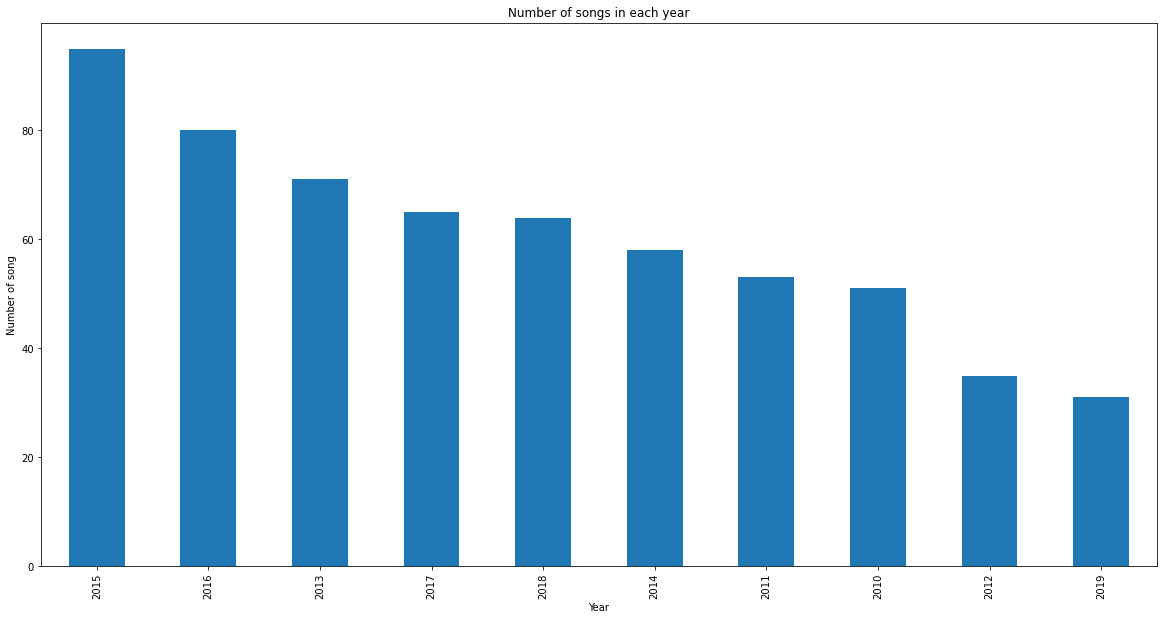

In [85]:
# number of songs in each year
spotify_songs['year'].value_counts().head(10).plot.bar(figsize=(20,10))
plt.xlabel('Year')
plt.ylabel('Number of song')
plt.title('Number of songs in each year')

Text(0.5, 1.0, 'Top 10 genre in percentage')

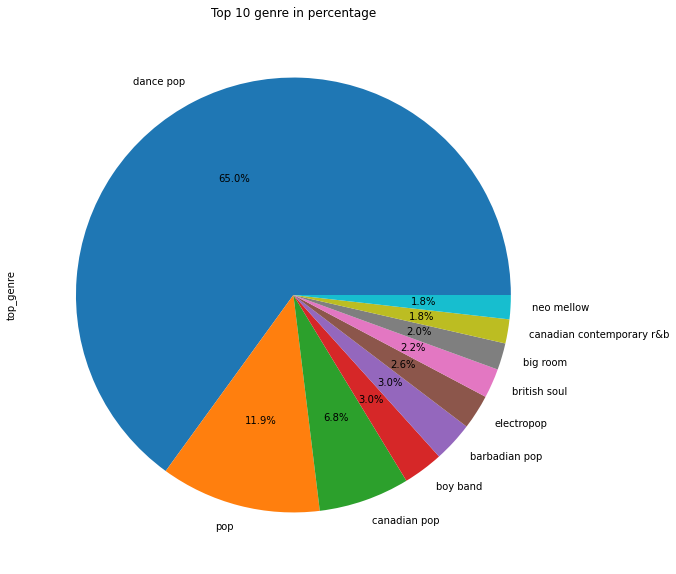

In [86]:
# top 10 genre in %
spotify_songs['top_genre'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 genre in percentage')

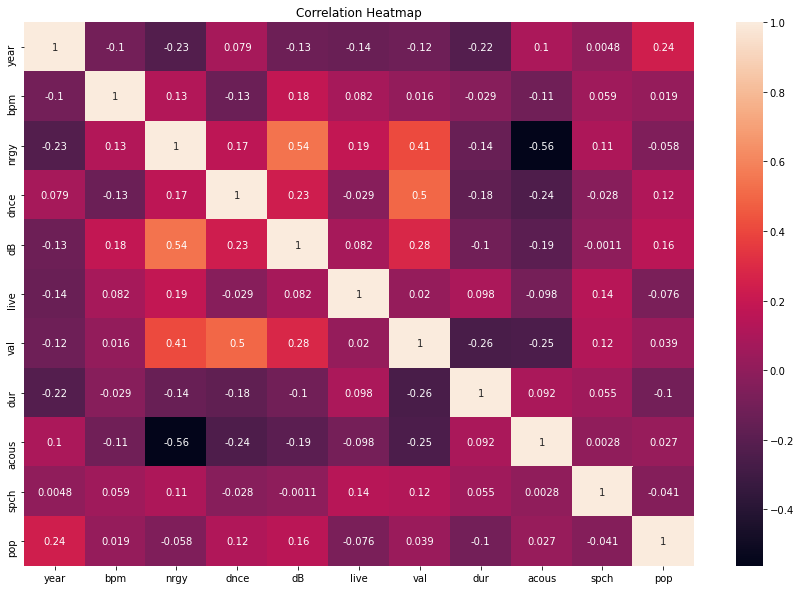

In [87]:
# data representation using heatmap
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap')
sns.heatmap(spotify_songs.corr(), annot=True)
plt.show()

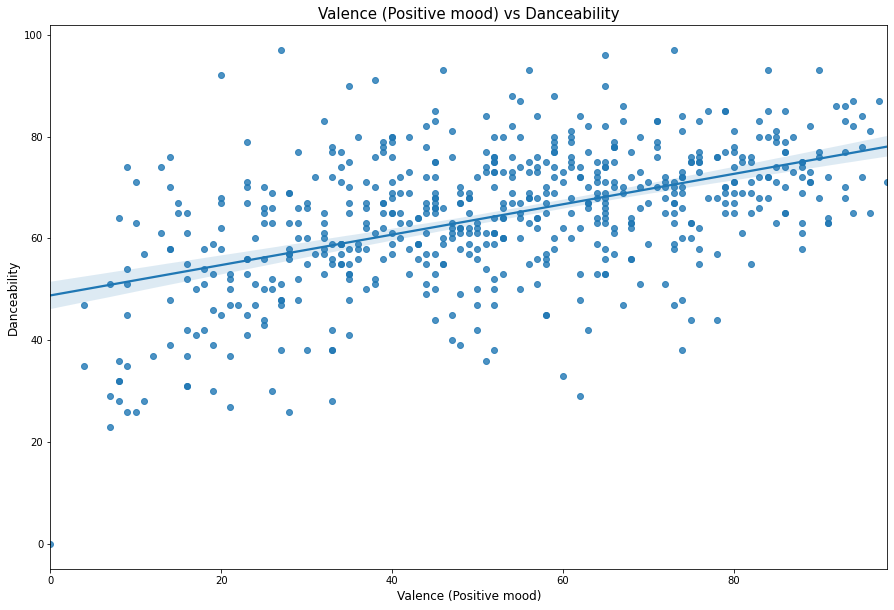

In [88]:
#  linear regression for 'Valence' (the higher the value, the more positive mood for the song) and 
# 'Danceability' (The higher the value, the easier it is to dance to this song).

#val and dnce
plt.figure(figsize=(15,10))
sns.regplot(x=spotify_songs.val,y=spotify_songs.dnce).set_title('Valence (Positive mood) vs Danceability',fontsize=15)
plt.xlabel('Valence (Positive mood)',fontsize=12);
plt.ylabel('Danceability',fontsize=12);

## 6. Insights
- Derive five valuable insights from the analysis

1. The top genres for Spotify Top Songs 2010-2019 are 'Dance Pop' , followed by 'Pop' and 'Canadian Pop'.
2. The top artists for Spotify Top Songs 2010-2019 are 	Katy Perry (17 songs), followed by Justin Bieber (16 songs), Rihanna and Maroon 5 (both 15 songs).
3. Memories by Maroon has the highest popularity of 99, followed by Lose you to love me by Selena Gomez (97) and Someone you loved by Lewis Capaldi (96).
4. Mark my words by Justin Bieber has the shortest music duration of 134 seconds and TKO by Justin Timberlake has the longest music duration of 424 seconds.
5. There are 33 songs having the most popularity of 72, followed by 27 songs having the popularity of 78 and 26 songs having the popularity of 73.
6. By calculating the average of the popularity and the size of each genre, although 'Dance Pop' is the most popular genre in the chart, the average popularity (64.36) is much lower than 'canadian pop'(72.24) and 'pop'(74.83). Therefore, Pop would be considered the most stable popular music genre.

<hr>

- Justify your insights with reference to the charts or analysis

1. Artists with most hits are Katy Perry(17 songs) , Justin Bieber(16 songs) , Rihanna & Maroon 5 (both 15 songs).
2. Years with most songs in chart are 2015 (95 songs), 2016 (80 songs) and 2013 (71 songs).
3. According to pie chart, 'Dance pop' (65%) is the most prevalent genre in the last decade. 'Pop' (11.9%) and 'Canadian pop' (6.8%) are second and third, respectively.
4. According to the correlation heatmap, highest positive correlations are between 'dB' & 'nrgy' (0.54), 'val' & 'dnce' (0.5) and 'val' & 'nrgy' (0.41). These are considered to be moderate type of correlation. Highest negative correlation is between 'dB' and 'acous' (-0.56).
5. Using linear regression to plot the relationship between Valence and Danceability, seems like the more positive mood the song has, the more danceable it is.

## 7. Machine Learning
- Describe what kind of prediction you could perform in future using machine learning and/or deep learning.

1. Collecting data such as user information, attributes of tracks or playlists that users are likely to listen on Spotify to predict users preferences and create personalised playlists or song recommendations for different users.
2. Analyse users’ information, playlists and personal history, which song or artist they've been listening to on loop, skip or avoid, like or dislike albums and more to generate ads for targeting listeners.
3. Predict how satisfied users are with their current experience in order to nudge them toward consuming more time on Spotify.
4. Predict users behaviours and exposing underrated artists to larger audiences more likely to enjoy it using Reinforcement Learning technique.
5. Predict whether or not a song will become a hit or feature on Spotify Top Chart based on its attributes.

<hr>

- Would you use classification or regression methods?

Regression method as Spotify requires data to forecast trends and predict continuous outcomes. 
